In [4]:
import json
import time
import datetime
import os,glob
import sys,re
import spidev
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import hilbert

import pyUn0 as us
%matplotlib inline

Data acquired


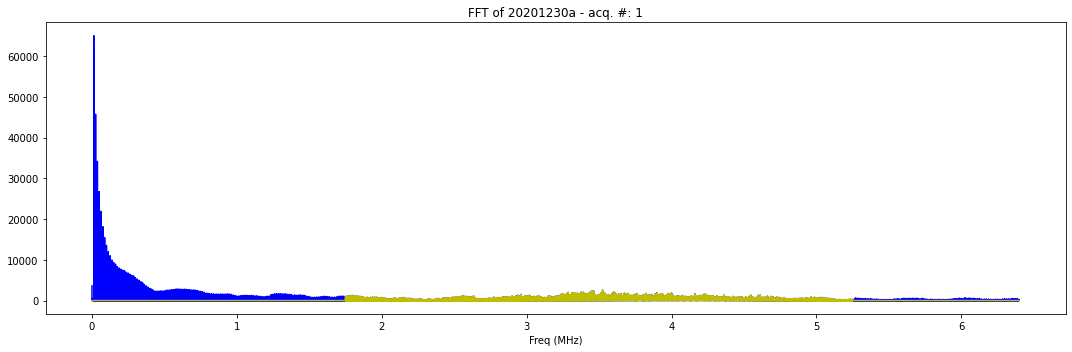

PyExiv not present


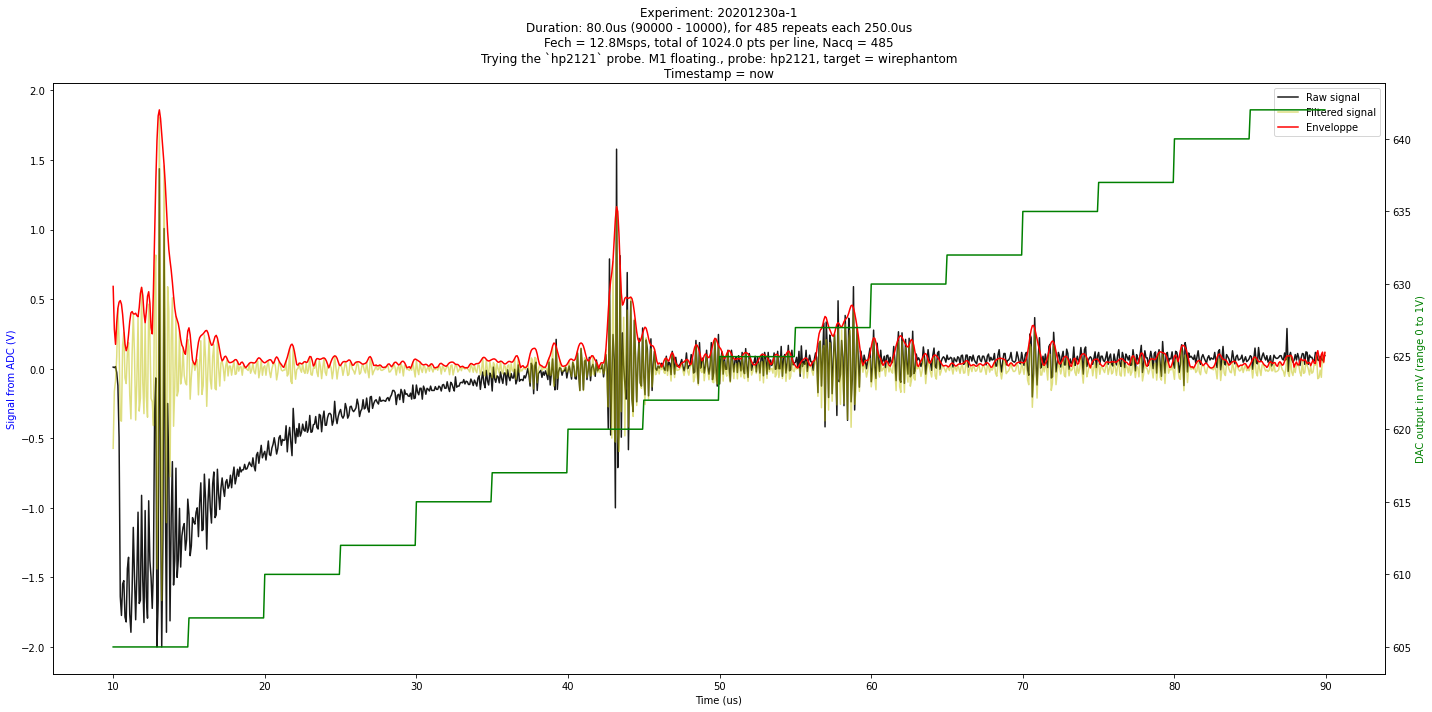

PyExiv not present
1024 485
PyExiv not present


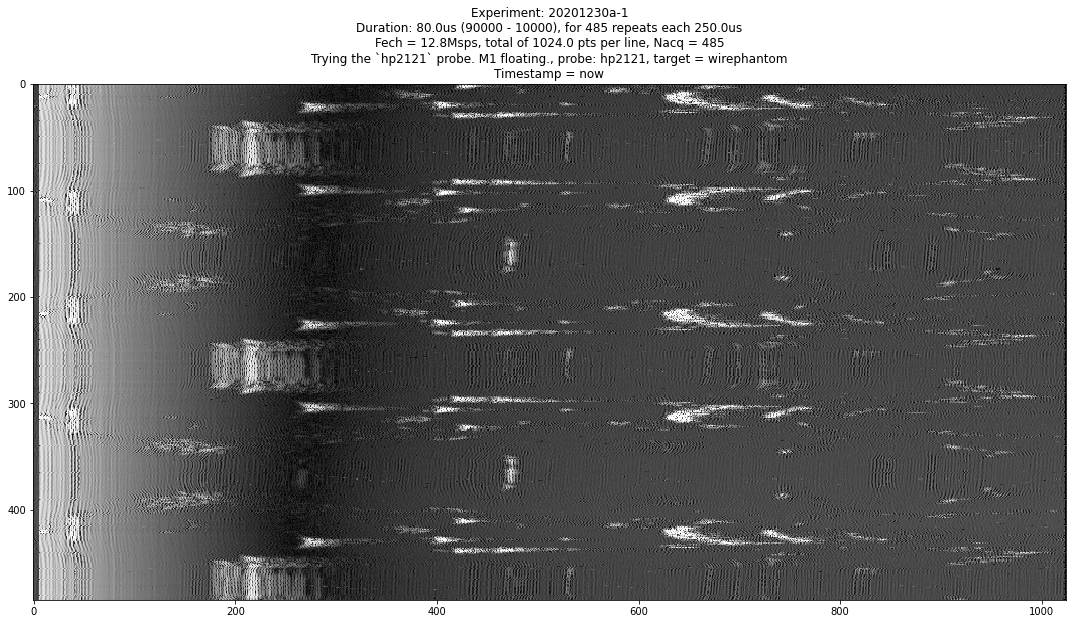

In [10]:
y = us.us_json()
y.JSONprocessing("./data/20201230a-1.json")
y.Bandwidth = 1.0
y.fPiezo = 3.5
y.create_fft() 
y.save_npz() 
y.mkImg() 
twodarray = y.mk2DArray()

In [35]:
y.Bandwidth = 0.5
y.fPiezo = 3.5

original_image = y.raw_2d_image
filtered_image = []
fft_image_filtered = []
num_lines, length_lines = np.shape(original_image)

f_min = (length_lines* y.fPiezo * (1 - y.Bandwidth/2.0) / y.f)
f_max = (length_lines * y.fPiezo * (1 + y.Bandwidth/2.0) / y.f)
                
f_array = [X*y.f / length_lines for X in range(int(length_lines))]

for k in range(int(num_lines)): # number of images
    fft_single_line = np.fft.fft(original_image[k])
    fft_image_filtered.append(fft_single_line)
    for p in range(int(len(fft_single_line)/2+1)): 
        if (p > f_max or p < f_min):
            fft_single_line[p] = 0
            fft_single_line[-p] = 0
    filtered_image.append(np.real(np.fft.ifft(fft_single_line)))

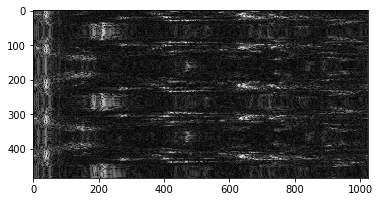

In [36]:
img_size = np.shape(filtered_image)
plt.imshow(np.sqrt(np.abs(filtered_image)), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')